In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from prettytable import PrettyTable

In [2]:
arr = np.array([[3],[4],[3],[4],[3],[4],[3],[4],[3],[4]])
arr.shape
arr.reshape(10,-1)
print(arr.shape)

(10, 1)


In [3]:
arr = np.arange(10)
arr.shape
np.random.shuffle(arr)
print(arr)

np.split(arr, [1])
print(arr)
arr.shape

[5 8 9 6 4 2 7 3 0 1]
[5 8 9 6 4 2 7 3 0 1]


(10,)

In [4]:
class Perceptron:
    '''
    The Rosenblatt's Perceptron
    '''
    def __init__(self, data):
        # variaveis constantes 
        self.bias = -1
        self.learning_rate = 0.1
        self.threshold = 0
        
        # variaveis proprias dos dados
        self.x = np.array([[self.bias,x[0],x[1]] for x in data])
        self.labels = np.array([x[2] for x in data])
        self.w = np.array(np.random.uniform(-0.5, 0.5, len(self.x[0])))
        
        # variaveis auxiliares 
        self.epoch = 1
        self.adjustment = 0
        
        print('Pesos iniciais: ', self.w)

    def unit_step(self,u):
        return 1 if u>= 0 else 0

    def weights_update(self,e,i):
        if(e!=0.0):
            self.adjustment += 1
            self.w = self.w + (self.learning_rate*e*self.x[i])
        return self.w

    def check_w(self):
        _labels = np.zeros(len(self.labels))
        for i in range(0, len(self.x)):
            _labels[i] = self.unit_step(sum(self.x[i]*self.w))
        return np.array_equal(_labels, self.labels)

    def learning(self):
        for i in range(0, len(self.x)):
            u = sum(self.x[i]*self.w)
            y = self.unit_step(u)
            e = self.labels[i] - y
            self.w = self.weights_update(e,i)
        self.epoch += 1
        #print(f'Fim da epoca {self.epoch} com o vetor de pesos: {self.w}')
        if (self.check_w()):
            print(f'\nTotal de ajustes no vetor de pesos: {self.adjustment}')
            print(f'Epocas ate a convergencia: {self.epoch}')
            return 0
        else:
            self.learning()
            
    def learning_2(self):
        table = PrettyTable()
        table.field_names = [
            'Taxa de Aprendizado',
            'Intervalo de Pesos',
            'Quantidade de Ajustes',
            'Menor número de épocas para convergência'
        ]
        config = np.array([
            [0.4,-100,100],
            [0.4,-0.5,0.5],
            [0.1,-100,100],
            [0.1,-0.5,0.5],
            [0.01,-100,100],
            [0.01,-0.5,0.5]
        ])
        iterations = 10
        for i in range(len(config)):
            adjustments = np.zeros(iterations)
            min_epoch = np.zeros(iterations)
            for j in range(iterations):
                # reset das variaveis auxiliares
                self.epoch = 1
                self.adjustment = 0
                
                # update dos atributos 
                self.learning_rate = config[i][0]
                self.w = np.array(np.random.uniform(config[i][1], config[i][2], len(self.x[0])))
                
                # treinamento
                self.learning()
                
                # adiciona nos arrays os outputs do treinamento
                adjustments[j] = self.adjustment
                min_epoch[j] = self.epoch
                
                # mostra o grafico do ultimo 
                if(j==iterations-1):
                    self.visualize()
            
            # quantidade de ajustes 
            mean_adjustment = np.mean(adjustments)
            std_adjustment = np.std(adjustments)
            
            # menor numero de epoca para convergencia
            min_epochs = min(min_epoch)
            
            # adiciona linha na tabela para cada configuracao
            table.add_row([
                self.learning_rate,
                (config[i][1],config[i][2]),
                str(str(round(mean_adjustment,2)) + '±' + str(round(std_adjustment,2))),
                min_epochs
            ])

        print(table)
        return 0
    
    def learning_holdout(self):
        '''
        Emabaralha e divide o array em dois:
            treinamento: 70% 
            teste: 30%
        '''
        np.random.shuffle(self.x)
        
            
    def transform_to_color(self,number):
        return 'r' if number==0.0 else 'b'
    
    def visualize(self):
        fig, ax = plt.subplots(figsize=(5,5))
        
        # pontos 
        xs = [x[1] for x in self.x]
        ys = [x[2] for x in self.x]
        colors = [self.transform_to_color(x) for x in self.labels]
        ax.scatter(xs,ys,c=colors)
        
        # reta
        _min = min(xs) or min(ys)
        _max = max(xs) and max(ys)
        _x = np.linspace(_min-1,_max+1, 100)
        _y = (self.w[0]/self.w[2]) - ((self.w[1]/self.w[2])*_x)
        plt.plot(_x,_y,linewidth=3,color='g')
        
        plt.show()
        return 0
    
    

# Parte 1 - Linearmente Separável

Pesos iniciais:  [-0.47857088  0.13029904  0.36477188]

Total de ajustes no vetor de pesos: 10
Epocas ate a convergencia: 8


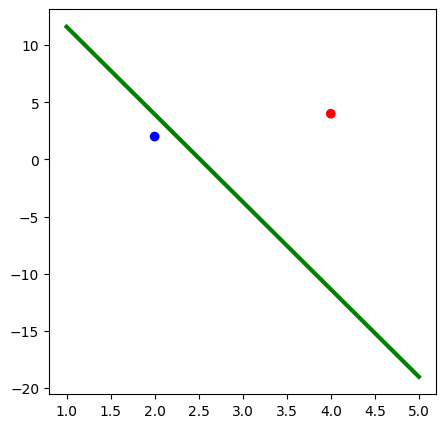

In [5]:
data = np.array([[2,2,1],[4,4,0]]) #self.w = np.array([-0.5441,0.5562,-0.4074])
tutorial = Perceptron(data)
tutorial.learning()
tutorial.visualize();

In [6]:
dataAll = np.fromfile('./Downloads/dataAll.txt').reshape(-1,3)
_dataAll = Perceptron(dataAll)
_dataAll.learning()
_dataAll.visualize();

FileNotFoundError: [Errno 2] No such file or directory: './Downloads/dataAll.txt'

# Parte 2 - Experimentação

In [ ]:
data0 = np.fromfile('./Downloads/data0.txt').reshape(-1,3)
_data0 = Perceptron(data0)
_data0.learning_2();

: 

# Parte 3 - Validação Holdout em Problema Não-Linearmente Separável

In [ ]:
dataHoldout = np.fromfile('./Downloads/dataHoldout.txt').reshape(-1,3)

: 

In [ ]:
# Visualizando que nao eh linearmente separavel
xs = [x[0] for x in dataHoldout]
ys = [x[1] for x in dataHoldout]
labels = [x[2] for x in dataHoldout]
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(xs,ys,c=labels)
plt.show()

: 

In [ ]:
_dataHoldout = Perceptron(dataHoldout)
_dataHoldout.learning()
dataHoldout.visualize();

: 

In [ ]:
s = dataHoldout.shape
print(s[0]*0.7)
print(s[0]*0.3)
print(dataHoldout.shape)
print(dataHoldout[0])

: 